# Feature Engineering Pipeline



- Pipeline - is a class that allows to run transformers and a machine learning model (estimator) in sequence.


- list of step-by-step instructions to transform your data.


- so, we can reuse the transformers and use it in both training and test set


- You only have to call fit and predict once on your data to fit a whole sequence of estimators.


- Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.



- All estimators in a pipeline, except the last one, must be transformers (i.e. must have a transform method). The last estimator may be any type (transformer, classifier, etc.)



- You can grid search over parameters of all estimators in the pipeline at once.



- The Pipeline is built using a list of (key, value) pairs, where the key is a string containing the name you want to give this step and value is an estimator object.


- The utility function "make_pipeline" is a shorthand for constructing pipelines; it takes a variable number of estimators and returns a pipeline, filling in the names automatically:


- make_pipeline(Binarizer(), MultinomialNB())
 - Pipeline(steps=[('binarizer', Binarizer()), ('multinomialnb', MultinomialNB())])

- from sklearn.pipeline import Pipeline






## Transformers: 
*************************



### for data preparation                                                                                                        


### fit-find parameters from training data                                                       


### transform-apply to training or test data                                                   


### standardscaler(),onehotencoder(),simpleimputer(),kbinsdiscretizer() etc..                                                               
                                                               







## Estimator  (Model):
********************************
  
  
  
### for modeling


### fit-find parameters from training data
  
### predict-apply to training or test data
  
### Gradientboostclasifier() ,LogisticRegression(),XGBoost() 




___________________________________________________________________________________


## Classification Pipeline – to tackle classification problem

## Regression Pipeline - to tackle regression problem









# Classification Pipeline

## Titanic Dataset

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline

# for feature engineering
from feature_engine import missing_data_imputers as mdi
from feature_engine import discretisers as dsc
from feature_engine import categorical_encoders as ce

In [45]:
data = pd.read_csv('D:/ShakthiSai -Keerthana Learnings/AI and Machine Learning/Feature Engineering/titanic_train.csv',
                   usecols=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
    'Embarked', 'Survived'])

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [46]:
data.columns 

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

## Datatype of Variables and variables

In [47]:

data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [48]:
for variables in data.columns:
    print(variables,data[variables].unique())
    print(variables,data[variables].nunique())

Survived [0 1]
Survived 2
Pclass [3 1 2]
Pclass 3
Sex ['male' 'female']
Sex 2
Age [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
Age 88
SibSp [1 0 3 4 2 5 8]
SibSp 7
Parch [0 1 2 5 3 4 6]
Parch 7
Fare [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.   

## Numerical(Discrete,continuous), mixed and Categorical Variables

In [49]:
discrete = [variables for variables in data.columns if data[variables].dtype!='O' and variables!='Survived' and data[variables].nunique()<10]

continuous = [variables for variables in data.columns if data[variables].dtype!='O' and variables!='Survived' and variables not in discrete]

mixed = ['Cabin']

categorical = [variables for variables in data.columns if data[variables].dtype=='O' and variables not in mixed]


In [50]:
discrete

['Pclass', 'SibSp', 'Parch']

In [51]:
continuous

['Age', 'Fare']

In [52]:
mixed

['Cabin']

In [53]:
categorical

['Sex', 'Embarked']

## Cardinality

In [54]:
data[categorical].nunique()

Sex         2
Embarked    3
dtype: int64

In [55]:
data[categorical+mixed].nunique()

Sex           2
Embarked      3
Cabin       147
dtype: int64

### cardinality of cabin is high. so, split into numerical and categorical part

## outliers

C:\Users\Vikee\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


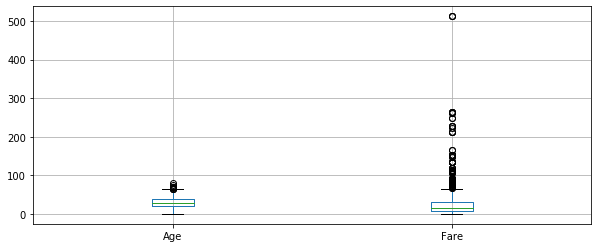

In [56]:
data[continuous].boxplot(figsize=(10,4))

## Engineering Mixed Variables

In [57]:
data['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [58]:
data['Cabin_class']=data['Cabin'].str[0]
data['Cabin_class']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin_class, Length: 891, dtype: object

In [59]:
data['Cabin_number'] = data['Cabin'].str.extract('(\d+)') # captures numerical part
data['Cabin_number'] = data['Cabin_number'].astype('float')
data['Cabin_number']

0        NaN
1       85.0
2        NaN
3      123.0
4        NaN
       ...  
886      NaN
887     42.0
888      NaN
889    148.0
890      NaN
Name: Cabin_number, Length: 891, dtype: float64

In [60]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_class,Cabin_number
0,0,3,male,22.0,1,0,7.2500,NaN,S,NaN,NaN
1,1,1,female,38.0,1,0,71.2833,C85,C,C,85.0
2,1,3,female,26.0,0,0,7.9250,NaN,S,NaN,NaN
3,1,1,female,35.0,1,0,53.1000,C123,S,C,123.0
4,0,3,male,35.0,0,0,8.0500,NaN,S,NaN,NaN


In [61]:
data.drop(['Cabin'], axis=1, inplace=True)

In [62]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_class,Cabin_number
0,0,3,male,22.0,1,0,7.2500,S,NaN,NaN
1,1,1,female,38.0,1,0,71.2833,C,C,85.0
2,1,3,female,26.0,0,0,7.9250,S,NaN,NaN
3,1,1,female,35.0,1,0,53.1000,S,C,123.0
4,0,3,male,35.0,0,0,8.0500,S,NaN,NaN


In [63]:
X=data.drop('Survived', axis=1)
y=data['Survived']

In [64]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_class,Cabin_number
0,3,male,22.0,1,0,7.2500,S,NaN,NaN
1,1,female,38.0,1,0,71.2833,C,C,85.0
2,3,female,26.0,0,0,7.9250,S,NaN,NaN
3,1,female,35.0,1,0,53.1000,S,C,123.0
4,3,male,35.0,0,0,8.0500,S,NaN,NaN


In [65]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [67]:
X_train['Cabin_class'].nunique()

8

### cardinality of cabin is reduced now.

## Missing data imputation

In [69]:
X_train.select_dtypes(exclude='O').isnull().sum()  # numerical variables

Pclass            0
Age             121
SibSp             0
Parch             0
Fare              0
Cabin_number    475
dtype: int64

In [70]:
X_train.select_dtypes(include='O').isnull().sum() # categorcal variables

Sex              0
Embarked         2
Cabin_class    471
dtype: int64

In [71]:


X_train.select_dtypes(exclude='O').isnull().mean()  # numerical

Pclass          0.000000
Age             0.194222
SibSp           0.000000
Parch           0.000000
Fare            0.000000
Cabin_number    0.762440
dtype: float64

In [72]:
X_train.select_dtypes(include='O').isnull().mean() # categorcal variables

Sex            0.000000
Embarked       0.003210
Cabin_class    0.756019
dtype: float64

## Imputation method for numerical variables : arbitrary value imputation

## Imputation method for categorical variables : missing label imputation

In [73]:
# check variable frequency

var = 'Cabin_class'
(X_train[var].value_counts() / len(X_train)).sort_values()

T    0.001605
G    0.003210
F    0.014446
A    0.022472
D    0.041734
E    0.043339
B    0.049759
C    0.067416
Name: Cabin_class, dtype: float64

### Category endoder:  Categories T and G appear only in few observations, so  replace them into rare category encoder

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline

# for feature engineering
from feature_engine import missing_data_imputers as mdi
from feature_engine import discretisers as dsc
from feature_engine import categorical_encoders as ce

## Pipeline :

In [77]:
data_pipe = Pipeline([
    
    # MISSING DATA IMPUTATION

    ('imputer_number',mdi.ArbitraryNumberImputer(arbitrary_number=-1,variables=['Age','Cabin_number'])) ,
    
    ('imputer_category',mdi.CategoricalVariableImputer(variables=['Embarked','Cabin_class'])),
    
    # CATEGORICAL ENCODING
    
    ('rarelabel_encoder',ce.RareLabelCategoricalEncoder(tol=0.01,
                                    n_categories=6,
                                    variables=['Cabin_class'])),
    
    ('categorical_encoder',ce.OrdinalCategoricalEncoder(encoding_method='ordered',
                                  variables=['Cabin_class', 'Sex', 'Embarked'])),
    
    # MODEL
    
    ('gbm', GradientBoostingClassifier(random_state=0))
])


In [78]:
data_pipe.fit(X_train,y_train)

Pipeline(steps=[('imputer_number',
                 ArbitraryNumberImputer(arbitrary_number=-1,
                                        variables=['Age', 'Cabin_number'])),
                ('imputer_category',
                 CategoricalVariableImputer(variables=['Embarked',
                                                       'Cabin_class'])),
                ('rarelabel_encoder',
                 RareLabelCategoricalEncoder(n_categories=6, tol=0.01,
                                             variables=['Cabin_class'])),
                ('categorical_encoder',
                 OrdinalCategoricalEncoder(variables=['Cabin_class', 'Sex',
                                                      'Embarked'])),
                ('gbm', GradientBoostingClassifier(random_state=0))])

In [79]:
train_predictions=data_pipe.predict_proba(X_train)[:,1]  # probability of Class 1
test_predictions=data_pipe.predict_proba(X_test)[:,1]

In [80]:
train_predictions

array([0.72616419, 0.97029592, 0.05581693, 0.13133038, 0.69648091,
       0.61366354, 0.36252403, 0.11080611, 0.14929005, 0.2977039 ,
       0.82284003, 0.45992523, 0.08400724, 0.72853366, 0.12410412,
       0.91937772, 0.02729417, 0.08858256, 0.16617946, 0.04516612,
       0.10141699, 0.18495947, 0.15205897, 0.13207153, 0.8039196 ,
       0.92037472, 0.90658035, 0.16165867, 0.11994105, 0.13397657,
       0.31619481, 0.15001611, 0.95134128, 0.1184307 , 0.15803428,
       0.61226113, 0.85614866, 0.82284003, 0.14197384, 0.07704759,
       0.7774994 , 0.11217899, 0.45537086, 0.20938782, 0.26882415,
       0.08677924, 0.07905754, 0.87619744, 0.16576346, 0.15908895,
       0.03085568, 0.30271949, 0.12340126, 0.6776965 , 0.98281267,
       0.86480995, 0.33240528, 0.20075624, 0.15553578, 0.05033322,
       0.37816302, 0.1184307 , 0.87346338, 0.09564495, 0.49092278,
       0.12043774, 0.07956034, 0.09968583, 0.13218343, 0.0444781 ,
       0.93815259, 0.04723373, 0.10224745, 0.19488557, 0.11550

In [81]:
print('Train set')
print('GBM roc-auc: {}'.format(roc_auc_score(y_train,train_predictions)))

print('Test set')
print('GBM roc-auc: {}'.format(roc_auc_score(y_test, test_predictions)))

Train set
GBM roc-auc: 0.9555107264484501
Test set
GBM roc-auc: 0.8676488095238095


## Pipeline’s named_steps attribute 
### allows accessing steps by name 

In [82]:
data_pipe.named_steps['imputer_number'].imputer_dict_

{'Age': -1, 'Cabin_number': -1}

In [83]:
data_pipe.named_steps['categorical_encoder']

OrdinalCategoricalEncoder(variables=['Cabin_class', 'Sex', 'Embarked'])

## Pipeline’s steps attribute  
### The estimators of a pipeline are stored as a list in the steps attribute, but can be accessed by index or name

In [85]:
data_pipe.steps[0]  # .steps using index

('imputer_number',
 ArbitraryNumberImputer(arbitrary_number=-1, variables=['Age', 'Cabin_number']))

In [86]:
data_pipe.steps[1]  # .steps using index

('imputer_category',
 CategoricalVariableImputer(variables=['Embarked', 'Cabin_class']))

In [87]:
data_pipe[0]   # directly by index

ArbitraryNumberImputer(arbitrary_number=-1, variables=['Age', 'Cabin_number'])

In [88]:
data_pipe['imputer_number']  # directly by name

ArbitraryNumberImputer(arbitrary_number=-1, variables=['Age', 'Cabin_number'])

## Feature importance

In [90]:
featureimportance = pd.Series(data_pipe.named_steps['gbm'].feature_importances_)

In [91]:
featureimportance

0    0.097135
1    0.458222
2    0.151946
3    0.025308
4    0.013029
5    0.139141
6    0.024109
7    0.018333
8    0.072777
dtype: float64

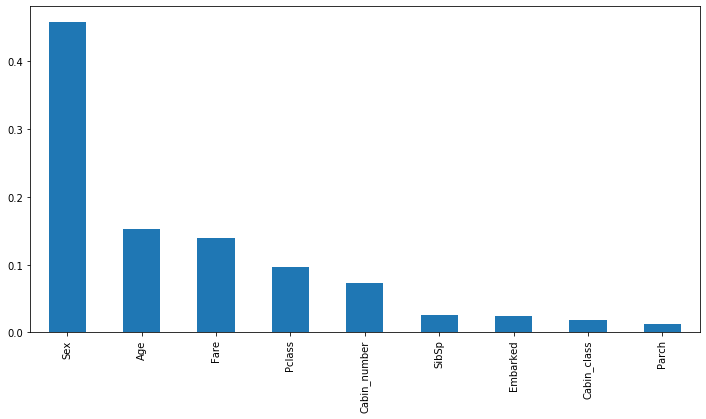

In [94]:
featureimportance.index = data.drop('Survived', axis=1).columns
featureimportance.sort_values(inplace=True, ascending=False)
featureimportance.plot.bar(figsize=(12,6))